# Overview


This demo shows how to load, train and test with the `Biased-Cars Dataset`. Below are samples from the dataset.

In [ ]:
import os
def create_folder(path):
    if not os.path.isdir(path):
        os.mkdir(path)

In [ ]:
# rm -r /content/generalization_to_OOD_category_viewpoint_combinations

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Cloning code base to colab....')
    !git clone https://github.com/GregoryEHunter/generalization_to_OOD_category_viewpoint_combinations.git
    !cd generalization_to_OOD_category_viewpoint_combinations/utils && bash download_biased_cars.sh
    CODE_ROOT = "generalization_to_OOD_category_viewpoint_combinations"
else:
    CODE_ROOT = '..'

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/._frame_0005_0_5_6202028_2020-04-06_VQYHXAH9.png  
  inflating: biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/frame_0005_0_5_6302999_2020-04-07_6TRPHPKK.png  
  inflating: __MACOSX/biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/._frame_0005_0_5_6302999_2020-04-07_6TRPHPKK.png  
  inflating: biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/frame_0005_0_5_6198284_2020-04-06_8FD7V68U.png  
  inflating: __MACOSX/biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/._frame_0005_0_5_6198284_2020-04-06_8FD7V68U.png  
  inflating: biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/frame_0005_0_5_6299900_2020-04-07_97E1HH8L.png  
  inflating: __MACOSX/biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/._frame_0005_0_5_6299900_2020-04-07_97E1HH8L.png  
  inflating: biased_cars_3/RED_CARS_9_SCALE_4_ROTATION/val/images/frame_0005_0_5_6296562_2020-04-07_

In [ ]:
%matplotlib inline
from IPython.display import Image

In [ ]:
# CODE_ROOT = '..'

In [ ]:
pwd

'/content'

In [ ]:
# cd ..

/content/generalization_to_OOD_category_viewpoint_combinations


In [ ]:
cd generalization_to_OOD_category_viewpoint_combinations

/content/generalization_to_OOD_category_viewpoint_combinations


In [ ]:
pwd

'/content/generalization_to_OOD_category_viewpoint_combinations'

In [ ]:
cd res/

/content/generalization_to_OOD_category_viewpoint_combinations/res


In [ ]:
ls

loader/  loss/  metrics/  models/


In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
from PIL import ImageFile
import random
ImageFile.LOAD_TRUNCATED_IMAGES = True
import argparse
import pickle
import sys
#sys.path.append('%s/res/'%CODE_ROOT)
from models.models import get_model
from loader.loader import get_loader
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_palette("Set1", 8, .75)
sns.despine()

/content/generalization_to_OOD_category_viewpoint_combinations/res
/content/generalization_to_OOD_category_viewpoint_combinations/res/loader/loader.py
/content/generalization_to_OOD_category_viewpoint_combinations/res/loader


<Figure size 432x288 with 0 Axes>

# Sample images from the dataset

In [ ]:
image_url = "../docs/images/biased_cars_samples.gif"
Image(url=image_url, width=500)

### Make sure biased-cars data is downloaded and formatted

If data isn't downloaded, please run the bash script under `utils` following:

```
cd utils
bash download_biased_cars.sh
```

In [ ]:
DATASET_NAMES = ['rotation_model_15_compositions_seen']

NUM_EPOCHS = 10
BATCH_SIZE = 10
ARCH = 'LATE_BRANCHING_COMBINED'

image_transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])


GPU = 1

In [ ]:
NUM_CLASSES = (5,5,5,5)
loader_new = get_loader('multi_attribute_loader_file_list')

file_list_root = '%s/dataset_lists/biased_cars_lists/'%CODE_ROOT
att_path = "%s/data/biased_cars/att_dict_simplified.p"%CODE_ROOT

In [ ]:
print(file_list_root)

generalization_to_OOD_category_viewpoint_combinations/dataset_lists/biased_cars_lists/


In [ ]:
print(att_path)

generalization_to_OOD_category_viewpoint_combinations/data/biased_cars/att_dict_simplified.p


In [ ]:
shuffles = {'train':True,'val':True,'test':False}

In [ ]:
data_dir = '%s/data/'%CODE_ROOT

In [ ]:
print(data_dir)

generalization_to_OOD_category_viewpoint_combinations/data/


In [ ]:
pwd

'/content/generalization_to_OOD_category_viewpoint_combinations/res'

/content/generalization_to_OOD_category_viewpoint_combinations/dataset_lists/biased_cars_lists/train_list_rotation_model_15_compositions_seen.txt

In [ ]:
cd /content/

/content


In [ ]:
!pwd

/content


In [ ]:
!ls generalization_to_OOD_category_viewpoint_combinations/

!ls /content/generalization_to_OOD_category_viewpoint_combinations

accuracy_numbers.p  docs				README.md	  utils
data		    Huggingface_ViT_DEMO_To_Edit.ipynb	requirements.txt
dataset_lists	    LICENSE				res
demos		    pretrained_models			train.py
accuracy_numbers.p  docs				README.md	  utils
data		    Huggingface_ViT_DEMO_To_Edit.ipynb	requirements.txt
dataset_lists	    LICENSE				res
demos		    pretrained_models			train.py


In [ ]:
all_dsets = {}
all_dset_loaders = {}
all_dset_sizes = {}

for DATASET_NAME in DATASET_NAMES:
    file_lists = {}
    dsets = {}
    dset_loaders = {}
    dset_sizes = {}
    for phase in ['train','val','test']:
        file_lists[phase] = "%s%s_list_%s.txt"%(file_list_root,phase,DATASET_NAME)
        dsets[phase] = loader_new(file_lists[phase],att_path, image_transform, data_dir)
        dset_loaders[phase] = torch.utils.data.DataLoader(dsets[phase], batch_size=BATCH_SIZE, shuffle = shuffles[phase], num_workers=2,drop_last=True)
        dset_sizes[phase] = len(dsets[phase])
    all_dsets[DATASET_NAME] = dsets
    all_dset_loaders[DATASET_NAME] = dset_loaders
    all_dset_sizes[DATASET_NAME] = dset_sizes

In [ ]:
multi_losses = [nn.CrossEntropyLoss(),nn.CrossEntropyLoss(),nn.CrossEntropyLoss(),nn.CrossEntropyLoss()]

In [ ]:
def weight_scheduler(epoch_num, task):
    if task == 'shared':
        return [0.0,1.0,0.0,1.0]
    elif task == 'viewpoint':
        return [0.0,1.0,0.0,0.0]
    elif task == 'category':
        return [0.0,0.0,0.0,1.0]

In [ ]:
def train_epoch(dset_loaders, dset_sizes, model, task, optimizer):
    model.train()
    torch.set_grad_enabled(True)
    phase = 'train'
    
    weights = weight_scheduler(epoch, task)
    iters = 0
    phase_epoch_corrects = [0,0,0,0]
    phase_epoch_loss = 0
    
    for data in dset_loaders[phase]:
        inputs, labels_all, paths = data
        inputs = Variable(inputs.float().cuda())

        optimizer.zero_grad()
        model_outs = model(inputs)
        calculated_loss = 0
        batch_corrects = [0,0,0,0]
        
        for i in range(4):
            labels = labels_all[:,i]
            if GPU:
                labels = Variable(labels.long().cuda())
            loss = multi_losses[i]
            outputs = model_outs[i]
            calculated_loss += weights[i] * loss(outputs,labels)
            _, preds = torch.max(outputs.data, 1)
            batch_corrects[i] = torch.sum(preds == labels.data)
            phase_epoch_corrects[i] += batch_corrects[i]

        
        phase_epoch_loss += calculated_loss
        calculated_loss.backward()
        optimizer.step()
        iters += 1
    epoch_loss = phase_epoch_loss/dset_sizes[phase]
    # print('Train loss:%s'%epoch_loss)
    epoch_accs = [float(i)/dset_sizes[phase] for i in phase_epoch_corrects]

    if task == 'shared':
        epoch_gm = np.sqrt(epoch_accs[1] * epoch_accs[3])
    elif task == 'viewpoint':
        epoch_gm = epoch_accs[1]
    elif task == 'category':
        epoch_gm = epoch_accs[3]
    
    return model, epoch_loss, epoch_gm

In [ ]:
def test_epoch(dset_loaders, dset_sizes, model, best_model, best_test_loss, best_test_gm, task):
    model.eval()
    torch.set_grad_enabled(False)
    phase = 'val'
    weights = weight_scheduler(epoch, task)
    iters = 0
    phase_epoch_corrects = [0,0,0,0]
    phase_epoch_loss = 0
    
    for data in dset_loaders[phase]:
        inputs, labels_all, paths = data
        inputs = Variable(inputs.float().cuda())
        model_outs = model(inputs)
        calculated_loss = 0
        batch_corrects = [0,0,0,0]
        
        for i in range(4):
            labels = labels_all[:,i]
            if GPU:
                labels = Variable(labels.long().cuda())
            loss = multi_losses[i]
            outputs = model_outs[i]
            calculated_loss += weights[i] * loss(outputs,labels)
            _, preds = torch.max(outputs.data, 1)
            batch_corrects[i] = torch.sum(preds == labels.data)
            phase_epoch_corrects[i] += batch_corrects[i]


        phase_epoch_loss += calculated_loss
        iters += 1
    epoch_loss = phase_epoch_loss/dset_sizes[phase]
    # print('Test loss:%s'%epoch_loss)
    epoch_accs = [float(i)/dset_sizes[phase] for i in phase_epoch_corrects]
    
    if task == 'shared':
        epoch_gm = np.sqrt(epoch_accs[1] * epoch_accs[3])
    elif task == 'viewpoint':
        epoch_gm = epoch_accs[1]
    elif task == 'category':
        epoch_gm = epoch_accs[3]
    
    if epoch_loss < best_test_loss:
        best_model = model
        best_test_loss = epoch_loss
        best_test_gm = epoch_gm
    
    return best_model, epoch_loss, epoch_gm, best_test_loss, best_test_gm

In [ ]:
def unseen_test_epoch(dset_loaders, dset_sizes, model, task):
    model.eval()
    torch.set_grad_enabled(False)
    phase = 'test'

    weights = weight_scheduler(epoch, task)
    iters = 0
    phase_epoch_corrects = [0,0,0,0]
    phase_epoch_loss = 0
    
    for data in dset_loaders[phase]:
        inputs, labels_all, paths = data
        inputs = Variable(inputs.float().cuda())
        model_outs = model(inputs)
        calculated_loss = 0
        batch_corrects = [0,0,0,0]
        
        for i in range(4):
            labels = labels_all[:,i]
            if GPU:
                labels = Variable(labels.long().cuda())
            loss = multi_losses[i]
            outputs = model_outs[i]
            calculated_loss += weights[i] * loss(outputs,labels)
            _, preds = torch.max(outputs.data, 1)
            batch_corrects[i] = torch.sum(preds == labels.data)
            phase_epoch_corrects[i] += batch_corrects[i]


        phase_epoch_loss += calculated_loss
        iters += 1
    epoch_loss = phase_epoch_loss/dset_sizes[phase]
    epoch_accs = [float(i)/dset_sizes[phase] for i in phase_epoch_corrects]
    
    if task == 'shared':
        epoch_gm = np.sqrt(epoch_accs[1] * epoch_accs[3])
    elif task == 'viewpoint':
        epoch_gm = epoch_accs[1]
    elif task == 'category':
        epoch_gm = epoch_accs[3]
    
    return epoch_loss, epoch_gm

In [ ]:
#
# import torch
# import torch.nn as nn
# from torchvision import datasets, models, transforms


# class MyModel(nn.Module):
#     def __init__(self, num_classes1, num_classes2):
#         super(MyModel, self).__init__()
#         self.model_resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
#         num_ftrs = self.model_resnet.fc.in_features
#         #self.model_resnet.fc = nn.Identity() #not sure this is necessary
#         self.fc1 = nn.Linear(1000, num_classes1) #1000 outputs default from resnet
#         self.softmax_fc1 = nn.Softmax()
#         self.fc2 = nn.Linear(1000, num_classes2)
#         self.softmax_fc2  = nn.Softmax()
#     def forward(self, x):
#         x = self.model_resnet(x)
#         linear_out1 = self.fc1(x)
#         linear_out2 = self.fc2(x)
#         out1 = self.softmax_fc1(linear_out1)
#         out2 = self.softmax_fc2(linear_out2)
#         return out1, out1, out2, out2
    
# model = MyModel(10,10)
# print(model)

# import torch
# import torch.nn as nn
# from torchvision import datasets, models, transforms


# class MyModel(nn.Module):
#     def __init__(self, num_classes1, num_classes2):
#         super(MyModel, self).__init__()
#         self.model_resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
#         num_ftrs = self.model_resnet.fc.in_features
#         #self.model_resnet.fc = nn.Identity() #not sure this is necessary
#         self.fc1 = nn.Linear(1000, num_classes1) #1000 outputs default from resnet
#         self.fc2 = nn.Linear(1000, num_classes2)

#     def forward(self, x):
#         x = self.model_resnet(x)
#         out1 = self.fc1(x)
#         out2 = self.fc2(x)
#         return out1, out1, out2, out2
    
# model = MyModel(10,10)
# print(model)


class MyModel(nn.Module):
    def __init__(self, num_classes1, num_classes2):
        super(MyModel, self).__init__()
        self.num_classes1 = num_classes1
        self.model_resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
        num_ftrs = self.model_resnet.fc.in_features
        #self.model_resnet.fc = nn.Identity() #not sure this is necessary
        self.model_resnet.fc  = nn.Linear(512, num_classes1 + num_classes2 )
        # self.fc1 = nn.Linear(1000, num_classes1) #1000 outputs default from resnet
        # self.fc2 = nn.Linear(1000, num_classes2)

    def forward(self, x):
        x = self.model_resnet(x)
        #print(x.shape)
        out1 = x[:,0:self.num_classes1]
        out2 = x[:, self.num_classes1:]
        # out1 = self.fc1(x)
        # out2 = self.fc2(x)
        return out1, out1, out2, out2
    
model = MyModel(10,10)
print(model)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

MyModel(
  (model_resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

In [ ]:
DATASET_NAMES

['rotation_model_15_compositions_seen']

In [ ]:
dataset_titles = {}
dataset_titles['rotation_model_15_compositions_seen'] = "60% combinations seen"

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0, Task: viewpoint
---------
Epoch: 0, Task: category
---------
Epoch: 0, Task: shared
---------
Epoch: 1, Task: viewpoint
---------
Epoch: 1, Task: category
---------
Epoch: 1, Task: shared
---------
Epoch: 2, Task: viewpoint
---------
Epoch: 2, Task: category
---------
Epoch: 2, Task: shared
---------
Epoch: 3, Task: viewpoint
---------
Epoch: 3, Task: category
---------
Epoch: 3, Task: shared
---------
Epoch: 4, Task: viewpoint
---------
Epoch: 4, Task: category
---------
Epoch: 4, Task: shared
---------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


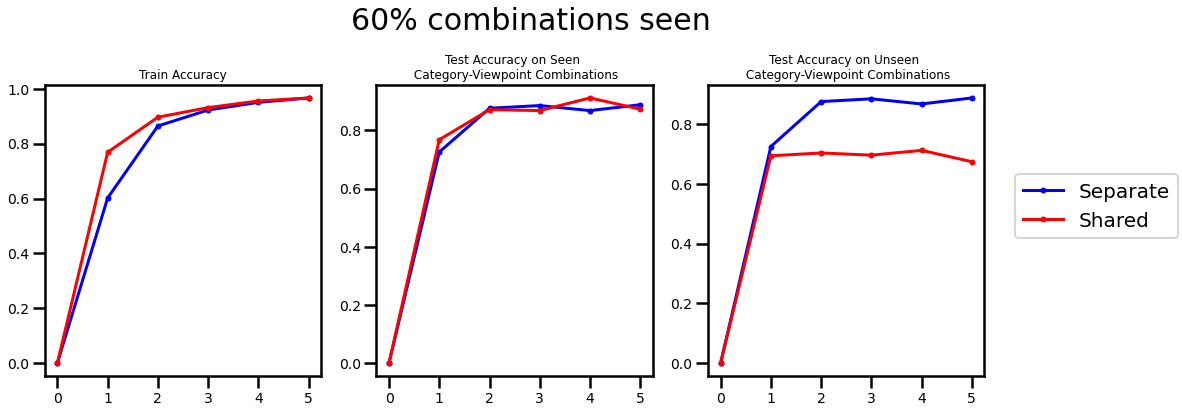

In [ ]:
for DATASET_NAME in DATASET_NAMES:
    dsets = all_dsets[DATASET_NAME]
    dset_loaders = all_dset_loaders[DATASET_NAME]
    dset_sizes = all_dset_sizes[DATASET_NAME]
    
    models = {} 


    #models['shared']= get_model(ARCH,NUM_CLASSES)
    #models['viewpoint']= get_model(ARCH,NUM_CLASSES)
    #models['category']= get_model(ARCH,NUM_CLASSES)

    ###############################################
    models['shared']= model
    models['viewpoint']= model
    models['category']= model
    ###############################################

    models['shared'].cuda();
    #summary(models['shared'], (3, 28, 28)) #print a model summary
    models['viewpoint'].cuda();
    models['category'].cuda();

    best_models = {}
    best_models['shared'] = models['shared']
    best_models['viewpoint'] = models['viewpoint']
    best_models['category'] = models['category']

    best_test_loss = 100
    best_test_gm = 0

    all_train_gms = {}
    all_train_gms['shared'] = [0]
    all_train_gms['separate'] = [0]

    all_test_gms = {}
    all_test_gms['shared'] = [0]
    all_test_gms['separate'] = [0]

    all_unseen_test_gms = {}
    all_unseen_test_gms['shared'] = [0]
    all_unseen_test_gms['separate'] = [0]

    optimizers = {}
    optimizers['shared'] = optim.Adam(models['shared'].parameters(), lr=0.001)
    optimizers['viewpoint'] = optim.Adam(models['viewpoint'].parameters(), lr=0.001)
    optimizers['category'] = optim.Adam(models['category'].parameters(), lr=0.001)
    for epoch in tqdm(range(5)):
        train_gm_separate = 1
        test_gm_separate = 1
        unseen_test_gm_separate = 1

        for TASK in ['viewpoint','category','shared']:
            print('Epoch: %s, Task: %s'%(epoch,TASK))
            print('---------')
            models[TASK], train_loss, train_gm = train_epoch(dset_loaders, dset_sizes, models[TASK], TASK, optimizers[TASK])
            best_models[TASK], test_loss, test_gm, best_test_loss, best_test_gm = test_epoch(dset_loaders, dset_sizes, models[TASK], best_models[TASK], best_test_loss, best_test_gm, TASK)
            unseen_test_loss, unseen_test_gm = unseen_test_epoch(dset_loaders, dset_sizes, models[TASK], TASK)

            if TASK != 'shared':
                train_gm_separate = train_gm_separate * train_gm
                test_gm_separate = test_gm_separate * test_gm
                unseen_test_gm_separate = unseen_test_gm_separate * test_gm

        all_train_gms['separate'].append(np.sqrt(train_gm_separate))
        all_test_gms['separate'].append(np.sqrt(test_gm_separate))
        all_unseen_test_gms['separate'].append(np.sqrt(unseen_test_gm_separate))
        all_train_gms['shared'].append(train_gm)
        all_test_gms['shared'].append(test_gm)
        all_unseen_test_gms['shared'].append(np.sqrt(unseen_test_gm))

    fig,ax = plt.subplots(1, 3, figsize=(18,6))
    fig.suptitle(dataset_titles[DATASET_NAME], fontsize = 30)
    l1 = ax[0].plot(all_train_gms['separate'], color = 'blue', marker = 'o', markersize=5)[0]
    l2 = ax[0].plot(all_train_gms['shared'], color = 'red', marker = 'o', markersize=5)[0]
    ax[0].set_title('Train Accuracy', fontsize=12)
    line_labels = ["Separate", "Shared"]

    ax[1].plot(all_test_gms['separate'], color = 'blue', marker = 'o', markersize=5)
    ax[1].plot(all_test_gms['shared'], color = 'red', marker = 'o', markersize=5)
    ax[1].set_title('Test Accuracy on Seen \n Category-Viewpoint Combinations', fontsize=12)

    ax[2].plot(all_unseen_test_gms['separate'], color = 'blue', marker = 'o', markersize=5)
    ax[2].plot(all_unseen_test_gms['shared'], color = 'red', marker = 'o', markersize=5)
    ax[2].set_title('Test Accuracy on Unseen \n Category-Viewpoint Combinations', fontsize=12)
    fig.legend([l1, l2],     # The line objects
            labels=line_labels,   # The labels for each line
            loc="center right",   # Position of legend
            borderaxespad=0.2,    # Small spacing around legend box
            prop={"size":20})
    plt.subplots_adjust(right=0.85, top =0.80)
    plt.show()